In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Percentage of Gene Records with collisions per source

In [2]:
import sys
from pathlib import Path

# Add output/ to sys.path so you can import from it
sys.path.append(str(Path().resolve().parent / "output"))

In [3]:
from collision_analysis_shared_variables import *

In [4]:
#from 1_alias_primary_collision_analysis: ap_record_count_xxxx
#HGNC, ENSG, NCBI
ap_record_counts = [ap_record_count_hgnc,ap_record_count_ensg,ap_record_count_ncbi]

In [5]:
#from 1_alias_primary_collision_analysis: gene_record_count_xxxx
#HGNC, ENSG, NCBI
total_record_counts = [gene_record_count_hgnc, gene_record_count_ensg, gene_record_count_ncbi]

In [6]:
#from 1_alias_primary_collision_analysis: xxxx_alias_primary_collision_primary_symbol_set/total_number_xxxx_gene_symbols
hgnc_percent_records_with_ap_collision = (ap_record_count_hgnc/gene_record_count_hgnc)*100
ensg_percent_records_with_ap_collision = (ap_record_count_ensg/gene_record_count_ensg)*100
ncbi_percent_records_with_ap_collision = (ap_record_count_ncbi/gene_record_count_ncbi)*100

In [7]:
#from 3_alias_alias_collision_distribution_analysis: xxxx_aa_collision_primary_symbol_count
#HGNC, ENSG, NCBI
aa_record_counts = [aa_record_count_hgnc, aa_record_count_ensg, aa_record_count_ncbi]

In [8]:
#from 3_alias_alias_collision_distribution_analysis: xxxx_aa_collision_primary_symbol_count/xxxx_gene_symbol_count
#currently using gene symbols, need to use gene records (IDs)
hgnc_percent_records_with_aa_collision = (aa_record_count_hgnc/gene_record_count_hgnc)*100
ensg_percent_records_with_aa_collision = (aa_record_count_ensg/gene_record_count_ensg)*100
ncbi_percent_records_with_aa_collision = (aa_record_count_ncbi/gene_record_count_ncbi)*100

In [9]:
both_collision_record_set_hgnc = ap_record_set_hgnc.intersection(aa_record_set_hgnc)
both_collision_record_count_hgnc = len(both_collision_record_set_hgnc)
both_collision_record_count_hgnc

157

In [10]:
both_collision_record_set_ensg = ap_record_set_ensg.intersection(aa_record_set_ensg)
both_collision_record_count_ensg = len(both_collision_record_set_ensg)
both_collision_record_count_ensg

282

In [11]:
both_collision_record_set_ncbi = ap_record_set_ncbi.intersection(aa_record_set_ncbi)
both_collision_record_count_ncbi = len(both_collision_record_set_ncbi)
both_collision_record_count_ncbi

791

In [12]:
both_collision_record_counts = [both_collision_record_count_hgnc, both_collision_record_count_ensg,both_collision_record_count_ncbi]


In [13]:
hgnc_percent_records_with_both_collision = (both_collision_record_count_hgnc/gene_record_count_hgnc)*100
ensg_percent_records_with_both_collision = (both_collision_record_count_ensg/gene_record_count_ensg)*100
ncbi_percent_records_with_both_collision = (both_collision_record_count_ncbi/gene_record_count_ncbi)*100

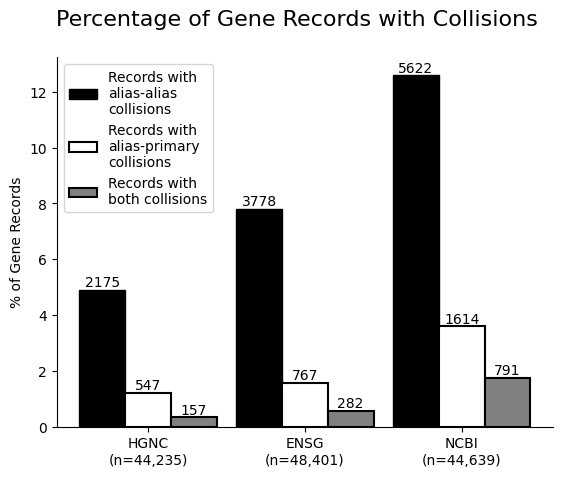

In [17]:
databases = [
    f'HGNC\n(n={gene_record_count_hgnc:,})',
    f'ENSG\n(n={gene_record_count_ensg:,})',
    f'NCBI\n(n={gene_record_count_ncbi:,})'
]
percent_records_with_aa_collision = [hgnc_percent_records_with_aa_collision, ensg_percent_records_with_aa_collision, ncbi_percent_records_with_aa_collision]
percent_records_with_ap_collision = [hgnc_percent_records_with_ap_collision, ensg_percent_records_with_ap_collision, ncbi_percent_records_with_ap_collision] 
percent_records_with_both_collision = [hgnc_percent_records_with_both_collision, ensg_percent_records_with_both_collision, ncbi_percent_records_with_both_collision]

x = np.arange(len(databases)) * 1.2

# Width of the bars
width = 0.35

# Plotting the bars
fig, ax = plt.subplots()

bar1 = ax.bar(x - .35, percent_records_with_aa_collision, width, label='Records with\nalias-alias\ncollisions',
              color='black', edgecolor='black')

# bar2: all white fill with black edge
bar2 = ax.bar(x, percent_records_with_ap_collision, width, label='Records with\nalias-primary\ncollisions',
              color='white', edgecolor='black', linewidth=1.5)

# bar3: all gray fill with black edge
bar3 = ax.bar(x + .35, percent_records_with_both_collision, width, label='Records with\nboth collisions',
              color='gray', edgecolor='black', linewidth=1.5)

# Add raw count labels on bar1
for rect, count in zip(bar1, aa_record_counts):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), f'{count}', ha='center', va='bottom')

# Add raw count labels on bar2
for rect, count in zip(bar2, ap_record_counts):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), f'{count}', ha='center', va='bottom')

# Add raw count labels on bar3
for rect, count in zip(bar3, both_collision_record_counts):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), f'{count}', ha='center', va='bottom')

# Labels and title
ax.set_ylabel(f'% of Gene Records')
ax.set_xticks(x)
ax.set_xticklabels(databases)
ax.legend(loc='upper left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.suptitle("Percentage of Gene Records with Collisions", fontsize=16)
plt.show()


# Number of Ambiguous Symbols due to collisions per source

In [15]:
aa_and_ap_ambiguous_symbol_count_hgnc = len(aa_ambiguous_symbol_set_hgnc.intersection(ap_ambiguous_symbol_set_hgnc))
aa_and_ap_ambiguous_symbol_count_ensg = len(aa_ambiguous_symbol_set_ensg.intersection(ap_ambiguous_symbol_set_ensg))
aa_and_ap_ambiguous_symbol_count_ncbi = len(aa_ambiguous_symbol_set_ncbi.intersection(ap_ambiguous_symbol_set_ncbi))

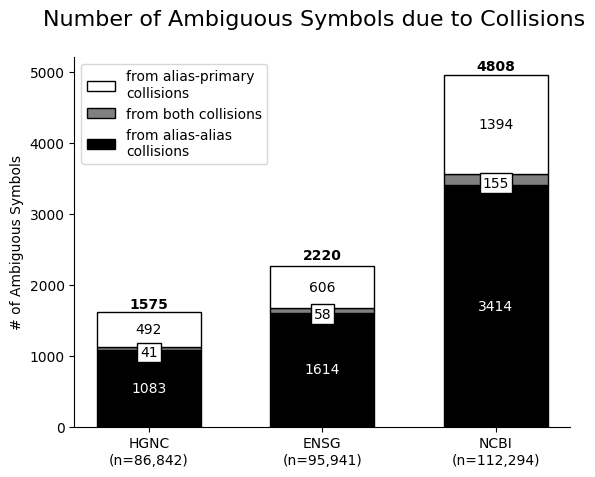

In [18]:
databases = [
    f'HGNC\n(n={total_symbol_count_hgnc:,})',
    f'ENSG\n(n={total_symbol_count_ensg:,})',
    f'NCBI\n(n={total_symbol_count_ncbi:,})'
]
aa_ambiguous_symbol_count = [aa_ambiguous_symbol_count_hgnc, aa_ambiguous_symbol_count_ensg, aa_ambiguous_symbol_count_ncbi]
aa_and_ap_ambiguous_symbol_count = [aa_and_ap_ambiguous_symbol_count_hgnc, aa_and_ap_ambiguous_symbol_count_ensg, aa_and_ap_ambiguous_symbol_count_ncbi]
ap_ambiguous_symbol_count = [ap_ambiguous_symbol_count_hgnc, ap_ambiguous_symbol_count_ensg, ap_ambiguous_symbol_count_ncbi]

x = np.arange(len(databases))
width = 0.6

fig, ax = plt.subplots()

# Use black, gray, white colors
bar1 = ax.bar(x, aa_ambiguous_symbol_count, width, label='from alias-alias\ncollisions', color='black', edgecolor='black')
bar2 = ax.bar(x, aa_and_ap_ambiguous_symbol_count, width, bottom=aa_ambiguous_symbol_count, label='from both collisions', color='gray', edgecolor='black')
bottom_1_2 = np.array(aa_ambiguous_symbol_count) + np.array(aa_and_ap_ambiguous_symbol_count)
bar3 = ax.bar(x, ap_ambiguous_symbol_count, width, bottom=bottom_1_2, label='from alias-primary\ncollisions', color='white', edgecolor='black')

def add_labels(bars, bottoms, values, text_color):
    for rect, bottom, value in zip(bars, bottoms, values):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            bottom + height / 2,
            str(value),
            ha='center', va='center',
            fontsize=10,
            color=text_color,
        )
def add_labels_with_box(bars, bottoms, values, text_color):
    for rect, bottom, value in zip(bars, bottoms, values):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            bottom + height / 2 - 50,
            str(value),
            ha='center', va='center',
            fontsize=10,
            color=text_color,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.2')
        )

# Add labels with color matching the background color for contrast
add_labels(bar1, np.zeros(len(aa_ambiguous_symbol_count)), aa_ambiguous_symbol_count, 'white')  
add_labels_with_box(bar2, aa_ambiguous_symbol_count, aa_and_ap_ambiguous_symbol_count, 'black')               
add_labels(bar3, bottom_1_2, ap_ambiguous_symbol_count, 'black')             

totals = np.array(aa_ambiguous_symbol_count) + np.array(ap_ambiguous_symbol_count)

for i, total in enumerate(totals):
    offsets = [60, 100, 180]
    ax.text(
        x[i],                 
        total + offsets[i],          
        str(total),           
        ha='center', va='bottom',
        fontsize=10,
        fontweight='bold'
    )

ax.set_ylabel(f'# of Ambiguous Symbols')
ax.set_xticks(x)
ax.set_xticklabels(databases)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.suptitle("Number of Ambiguous Symbols due to Collisions", fontsize=16)
plt.show()


the "total" number of ambiguous symbols in bold per database is the number of ambiguous symbols from aa + ap collisions. the number of ambiguous symbols from both collisions 